In [1]:
import os
import pandas as pd
import yfinance as yf
from yahoo_fin import stock_info
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
def makeDirIfNotExist(dir):
    try:
        if not os.path.exists(dir):
            os.makedirs(dir)
    except Exception as e:
        LOG(str(e))

In [3]:
class StockBasicInfo:
    def __init__(self, ticker):
        self.stock_stats = stock_info.get_stats(ticker)

    def getRoe(self):
        return self.__getValueByAttribute('Return on Equity (ttm)')

    def getPayoutRatio(self):
        return self.__getValueByAttribute('Payout Ratio 4')

    def getDividendYield(self):
        return self.__getValueByAttribute('Forward Annual Dividend Yield 4')

    def __getValueByAttribute(self, attribute):
        try:
            stock_stats = self.stock_stats
            value = stock_stats['Value'][stock_stats['Attribute'] == attribute].values[0]
            value = value.replace('%', '')
            return float(value)
        except Exception as e:
            print(e)
            return 'N/A'

In [4]:
class StockDivDataCollector:
    def __init__(self):
        pass
        #self.ticker = ticker
        #self.periods = periods

    def collect(self, ticker, periods=7):
        end_date = datetime.now().strftime("%Y-%m-%d")
        print("end date: " , end_date)
        start_date = (datetime.now() - relativedelta(years=periods)).strftime("%Y-%m-%d")
        print("start date: ", start_date)

        stock_div_data = stock_info.get_dividends(ticker, start_date=start_date, end_date=end_date)
        stock_div_data.drop(['ticker'], axis=1, inplace=True)

        # Get stock price data
        stock_price_data = yf.download(ticker, start_date, end_date)
        df_close_price = stock_price_data.loc[stock_div_data.index]['Close']
        stock_div_data['close'] = df_close_price

        div_freq = round(len(stock_div_data.index)/periods)
        div_yield = stock_div_data['dividend']*div_freq / stock_div_data['close'] * 100
        div_yield = round(div_yield, 2)
        stock_div_data['div yield'] = div_yield
        self.stock_div_data = stock_div_data
        return self.stock_div_data

In [17]:
class UsaDivStockPricer:
    def __init__(self, stockDivData):
        self.stockDivData = stockDivData

    def getBuyScore(self, current_div_yield):
        div_min = min(self.stockDivData['div yield'])
        div_max = max(self.stockDivData['div yield'])
        self.buyScore = self.__calculate_buy_score(current_div_yield, div_min, div_max)
        return self.buyScore
        
    def __get_percentage(self, input, min, max):
        return round((input - min) / (max - min) * 100)

    def __calculate_buy_score(self, current_div_yield, div_min, div_max):
        buy_score = self.__get_percentage(current_div_yield, div_min, div_max)
        return buy_score

In [6]:
def saveDivAnalysisChart(ticker, dividends, current_div_yield, img_file_path_to_save):
    div_min = min(dividends['div yield'])
    div_max = max(dividends['div yield'])
    
    plt.plot(dividends['div yield'],  color='b', label = 'dividend history')
    plt.axhline(y=div_min, color='y', linestyle='--', label='min div yield')
    plt.axhline(y=div_max, color='r', linestyle='--', label='max div yield')
    plt.axhline(y=current_div_yield, color='g', linestyle='--', label='current div yield')
    plt.title(f'{ticker} dividend analysis')
    plt.xlabel('year')
    plt.ylabel('dividend yield')
    plt.legend()
    plt.savefig(img_file_path_to_save)
    plt.show()

"""Analyze usa dividend stock"""

In [7]:
tickers = ['EXR',
           'AMGN',
           'MAA',
           'TXN',
           'LMT',
           'APD',
           'HD',
           'ADP',
           'ITW',
           'HON',           
]

In [8]:
out_dir = os.path.join(os.getcwd(), 'output')
makeDirIfNotExist(out_dir)

cur_div_yield = 4.04
end date:  2023-03-12
start date:  2016-03-12
[*********************100%***********************]  1 of 1 completed
buy_score = 86


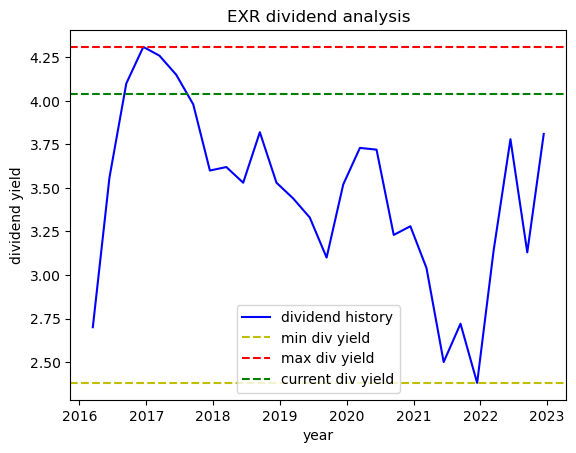

cur_div_yield = 3.77
end date:  2023-03-12
start date:  2016-03-12
[*********************100%***********************]  1 of 1 completed
buy_score = 119


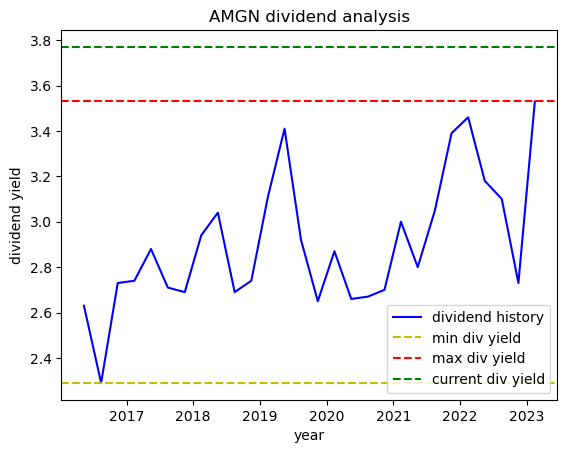

cur_div_yield = 3.66
end date:  2023-03-12
start date:  2016-03-12
[*********************100%***********************]  1 of 1 completed
buy_score = 80


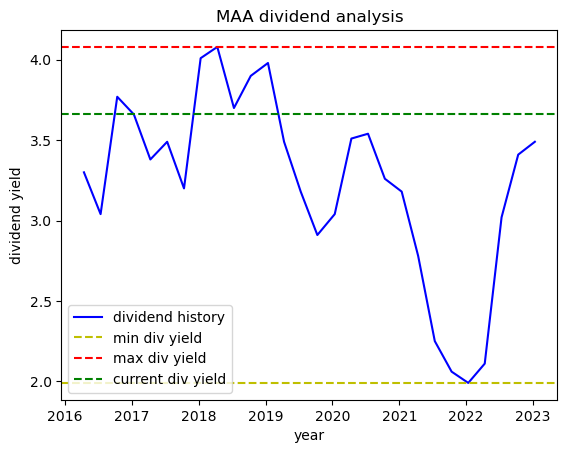

cur_div_yield = 2.86
end date:  2023-03-12
start date:  2016-03-12
[*********************100%***********************]  1 of 1 completed
buy_score = 61


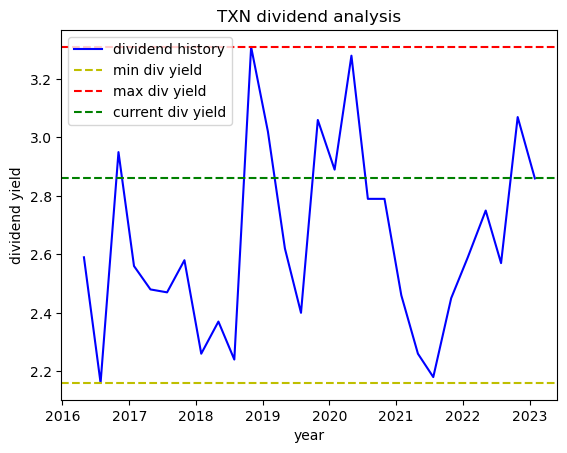

cur_div_yield = 2.52
end date:  2023-03-12
start date:  2016-03-12
[*********************100%***********************]  1 of 1 completed
buy_score = 23


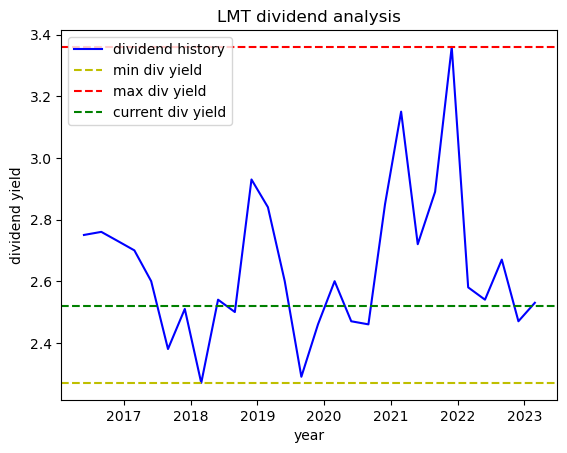

cur_div_yield = 2.46
end date:  2023-03-12
start date:  2016-03-12
[*********************100%***********************]  1 of 1 completed
buy_score = 64


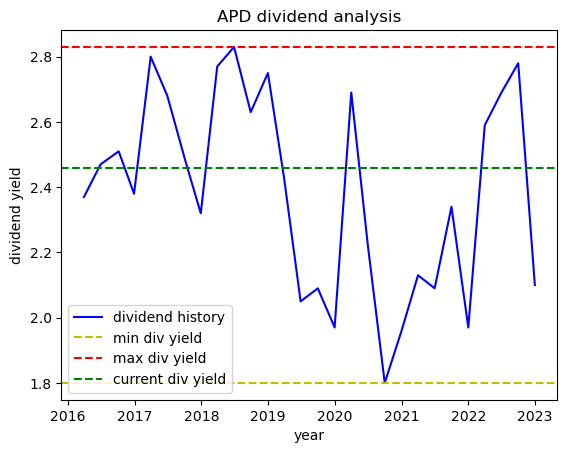

cur_div_yield = 2.9
'float' object has no attribute 'replace'
end date:  2023-03-12
start date:  2016-03-12
[*********************100%***********************]  1 of 1 completed
buy_score = 93


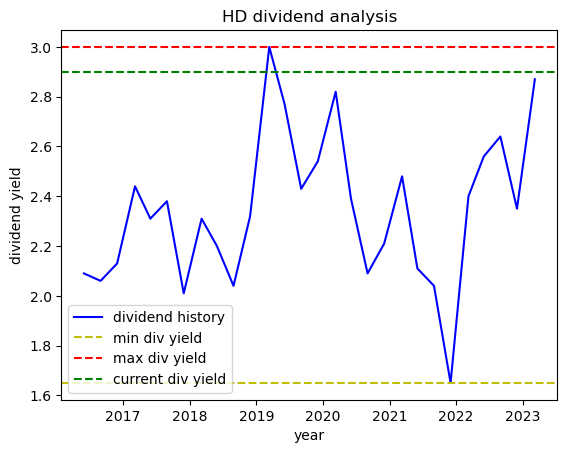

cur_div_yield = 2.28
end date:  2023-03-12
start date:  2016-03-12
[*********************100%***********************]  1 of 1 completed
buy_score = 52


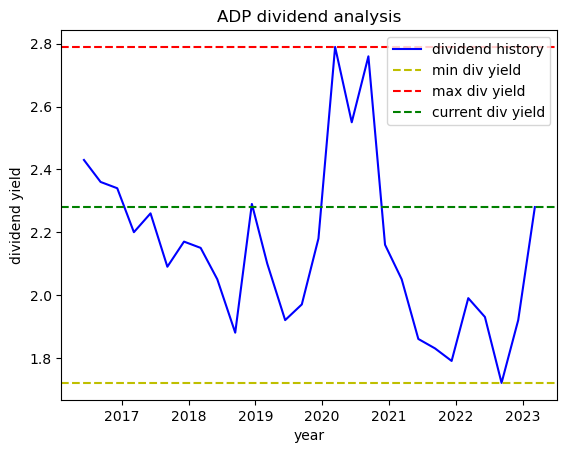

cur_div_yield = 2.23
end date:  2023-03-12
start date:  2016-03-12
[*********************100%***********************]  1 of 1 completed
buy_score = 30


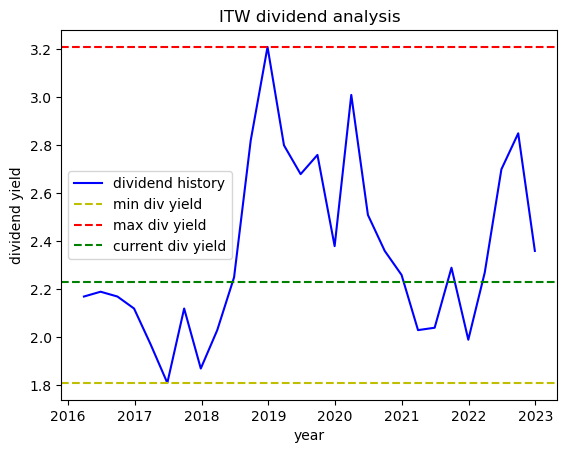

cur_div_yield = 2.14
end date:  2023-03-12
start date:  2016-03-12
[*********************100%***********************]  1 of 1 completed
buy_score = 44


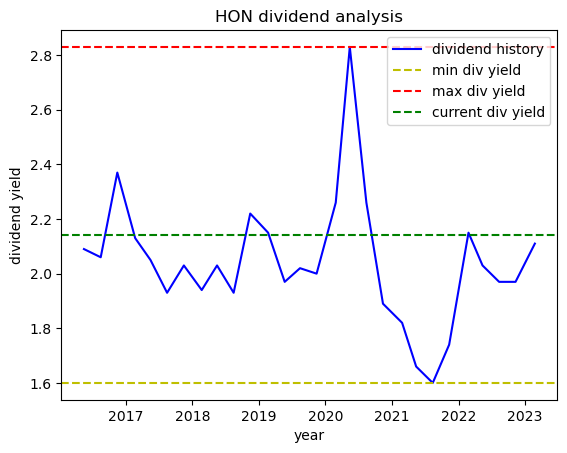

In [19]:
div_yields = []
payout_ratios = []
roes = []
buy_scores = []

for ticker in tickers:
    stockBasicInfo = StockBasicInfo(ticker)
    cur_div_yield  = stockBasicInfo.getDividendYield()
    div_yields.append(cur_div_yield)
    print(f'cur_div_yield = {cur_div_yield}')
    payout_ratios.append(stockBasicInfo.getPayoutRatio())
    roes.append(stockBasicInfo.getRoe())

    stockDivDataCollector = StockDivDataCollector()
    stock_div_data = stockDivDataCollector.collect(ticker)
    
    usaDivStockPricer = UsaDivStockPricer(stock_div_data)
    buy_score = usaDivStockPricer.getBuyScore(cur_div_yield)
    buy_scores.append(buy_score)
    print(f'buy_score = {buy_score}')

    chartFilePath = os.path.join(out_dir, ticker+'.png')
    saveDivAnalysisChart(ticker, stock_div_data, cur_div_yield, chartFilePath)
    time.sleep(2)

In [ ]:
buy_scores

In [ ]:
import pandas as pd

In [9]:
STOCK_FILE_NAME = './data/dividend_achievers.csv'
stock_df=  pd.read_csv(STOCK_FILE_NAME)
stock_df.head(3)

,Ticker,Name,Sector,Price,Dividend Yield,1-Year Dividend Growth,5-Year Dividend Growth (Annualized),Dividends Per Share (TTM),Market Cap ($M),Trailing P/E Ratio,Payout Ratio,Beta,52-Week High,52-Week Low
0,ABC,Amerisource Bergen Corp.,Healthcare,165.19,0.011744,0.054348,0.050006,1.850727,33914.756760,19.963714,0.230190,0.488536,174.63,125.96
1,ABM,ABM Industries Inc.,Industrials,46.40,0.018966,0.128205,0.046832,0.799450,3015.663443,13.088817,0.234443,0.852607,53.24,37.32
2,ABT,Abbott Laboratories,Healthcare,113.04,0.018047,0.085106,0.127411,1.907189,194164.375800,24.612039,0.428582,0.830347,128.65,92.83


In [11]:
target_stock_df = stock_df.loc[:,['Ticker','Name','Sector','1-Year Dividend Growth','5-Year Dividend Growth (Annualized)']]
target_stock_df

,Ticker,Name,Sector,1-Year Dividend Growth,5-Year Dividend Growth (Annualized)
0,ABC,Amerisource Bergen Corp.,Healthcare,0.054348,0.050006
1,ABM,ABM Industries Inc.,Industrials,0.128205,0.046832
2,ABT,Abbott Laboratories,Healthcare,0.085106,0.127411
3,ACN,Accenture plc,Technology,NaN,NaN
4,ADI,Analog Devices Inc.,Technology,0.101449,0.096262
...,...,...,...,...,...
366,WTRG,Essential Utilities Inc,Utilities,0.070097,0.069924
367,XEL,"Xcel Energy, Inc.",Utilities,0.065574,0.051086
368,XOM,Exxon Mobil Corp.,Energy,0.034091,0.033975
369,XYL,Xylem Inc,Industrials,0.071429,0.073941


In [15]:
target_stock_df = target_stock_df.loc[target_stock_df['Ticker'].isin(tickers)]
target_stock_df

,Ticker,Name,Sector,1-Year Dividend Growth,5-Year Dividend Growth (Annualized)
6,ADP,Automatic Data Processing Inc.,Industrials,0.201923,0.146869
19,AMGN,AMGEN Inc.,Healthcare,0.102273,0.080054
25,APD,Air Products & Chemicals Inc.,Basic Materials,0.080000,0.080499
116,EXR,Extra Space Storage Inc.,Real Estate,0.200000,0.139723
145,HD,"Home Depot, Inc.",Consumer Cyclical,0.151515,0.130273
153,HON,Honeywell International Inc,Industrials,0.051020,0.066931
169,ITW,"Illinois Tool Works, Inc.",Industrials,0.073770,0.109265
194,LMT,Lockheed Martin Corp.,Industrials,0.071429,0.084472
201,MAA,"Mid-America Apartment Communities, Inc.",Real Estate,0.287356,0.087007
335,TXN,Texas Instruments Inc.,Technology,0.078261,0.148698


In [20]:
target_stock_df['div_yields'] = div_yields
target_stock_df['payout_ratios'] = payout_ratios
target_stock_df['roes'] = roes
target_stock_df['buy_scores'] = buy_scores
target_stock_df

,Ticker,Name,Sector,1-Year Dividend Growth,5-Year Dividend Growth (Annualized),div_yields,payout_ratios,roes,buy_scores
6,ADP,Automatic Data Processing Inc.,Industrials,0.201923,0.146869,4.04,93.60,23.43,86
19,AMGN,AMGEN Inc.,Healthcare,0.102273,0.080054,3.77,64.08,126.47,119
25,APD,Air Products & Chemicals Inc.,Basic Materials,0.080000,0.080499,3.66,85.31,10.61,80
116,EXR,Extra Space Storage Inc.,Real Estate,0.200000,0.139723,2.86,49.84,62.69,61
145,HD,"Home Depot, Inc.",Consumer Cyclical,0.151515,0.130273,2.52,52.63,56.68,23
153,HON,Honeywell International Inc,Industrials,0.051020,0.066931,2.46,63.97,15.84,64
169,ITW,"Illinois Tool Works, Inc.",Industrials,0.073770,0.109265,2.90,45.54,N/A,93
194,LMT,Lockheed Martin Corp.,Industrials,0.071429,0.084472,2.28,58.11,78.3,52
201,MAA,"Mid-America Apartment Communities, Inc.",Real Estate,0.287356,0.087007,2.23,51.79,90.36,30
335,TXN,Texas Instruments Inc.,Technology,0.078261,0.148698,2.14,54.61,27.16,44


In [21]:
target_stock_df.to_csv('포브스-선정-Top10-배당주-2023.csv')

In [ ]:
tickers = stock_df['Ticker']
tickers

In [ ]:
start = time.time()

new_tickers = []
cur_divs = []
cur_div_yields = []
buy_scores = []
for ticker in tickers:
    try:
        cur_div, cur_div_yield, buy_score = getBuyScore(ticker)
        new_tickers.append(ticker)
        cur_divs.append(cur_div)
        cur_div_yields.append(cur_div_yield)
        buy_scores.append(buy_score)
    except Exception as e:
        print(e)

end = time.time()
print(f'{end - start} seconds')

In [ ]:
new_tickers[:3]

In [ ]:
buy_scores[:3]

In [ ]:
result = pd.DataFrame({'ticker': new_tickers,
                            'annual dividend':cur_divs, 
                            'dividend yield': cur_div_yields,
                            'buy score': buy_scores})

In [ ]:
result.head(3)

In [ ]:
result.sort_values('buy score', ascending=False, inplace=True)

In [ ]:
result.index = result['ticker']
result.drop('ticker', axis=1, inplace=True)

In [ ]:
result.head(3)

In [ ]:
plt.figure(figsize=(18,6))
result['buy score'].plot(kind='bar')
plt.show()

In [ ]:
result[result['buy score'] > 80].plot(kind='bar')
plt.show()

"""
get basic info
"""

In [ ]:
class StockBasicInfo:
    def __init__(self, ticker):
        self.ticker = ticker
        self.stock_stats = stock_info.get_stats(ticker)

    def getRoe(self):
        try:
            stock_stats = self.stock_stats
            roe = stock_stats['Value'][stock_stats['Attribute'] == 'Return on Equity (ttm)'].values[0]
            return roe
        except Exception as e:
            print(e)
            return 'N/A'
        
    def getPayoutRatio(self):
        try:
            stock_stats = self.stock_stats
            payout_ratio = stock_stats['Value'][stock_stats['Attribute'] == 'Payout Ratio 4'].values[0]
            return payout_ratio
        except Exception as e:
            print(e)
            return 'N/A'


In [ ]:
roes = []
payoutratios = []
for ticker in result.index:
    #print(ticker)
    stockBasicInfo = StockBasicInfo(ticker)
    roes.append(stockBasicInfo.getRoe())
    payoutratios.append(stockBasicInfo.getPayoutRatio())

In [ ]:
result['roe'] = roes

In [ ]:
result['payout ratio'] = payoutratios

In [ ]:
result.head(3)

In [ ]:
from datetime import date
today = date.today().strftime("%Y%m%d")
result_file_name = STOCK_FILE_NAME.split(".")[0] + "_result_" + today + ".xlsx"
result.to_excel(result_file_name)

"""
FIN
"""